In [18]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, balanced_accuracy_score

In [19]:
X_train = pd.read_csv("x_train.csv")
y_train = pd.read_csv("y_train.csv")
X_test  = pd.read_csv("x_test.csv")

### 1. EDA

In [20]:
print(X_train.shape, y_train.shape, X_test.shape)
print(X_train.describe())
print(X_train.head())
print(y_train.head())

(15882, 3) (15882, 3) (1819, 3)
         session_id
count  15882.000000
mean    7940.500000
std     4584.882823
min        0.000000
25%     3970.250000
50%     7940.500000
75%    11910.750000
max    15881.000000
   session_id                                   job_ids  \
0           0  [305, 299, 300, 290, 282, 274, 264, 261]   
1           1                       [84, 257, 252, 250]   
2           2       [241, 237, 221, 309, 310, 306, 301]   
3           3  [303, 297, 296, 298, 294, 295, 292, 293]   
4           4            [171, 291, 289, 166, 288, 155]   

                                             actions  
0  ['view', 'view', 'view', 'view', 'view', 'view...  
1                   ['view', 'view', 'view', 'view']  
2  ['view', 'view', 'apply', 'apply', 'apply', 'a...  
3  ['apply', 'apply', 'apply', 'apply', 'apply', ...  
4  ['apply', 'apply', 'apply', 'apply', 'apply', ...  
   session_id  job_id action
0           0      84   view
1           1     241   view
2           2   

### 2. Focusing on number of 'view' actions in each session

In [21]:
X_train["actions_list"] = X_train["actions"].apply(ast.literal_eval)
X_train



,session_id,job_ids,actions,actions_list
0,0,"[305, 299, 300, 290, 282, 274, 264, 261]","['view', 'view', 'view', 'view', 'view', 'view...","[view, view, view, view, view, view, view, view]"
1,1,"[84, 257, 252, 250]","['view', 'view', 'view', 'view']","[view, view, view, view]"
2,2,"[241, 237, 221, 309, 310, 306, 301]","['view', 'view', 'apply', 'apply', 'apply', 'a...","[view, view, apply, apply, apply, apply, apply]"
3,3,"[303, 297, 296, 298, 294, 295, 292, 293]","['apply', 'apply', 'apply', 'apply', 'apply', ...","[apply, apply, apply, apply, apply, apply, app..."
4,4,"[171, 291, 289, 166, 288, 155]","['apply', 'apply', 'apply', 'apply', 'apply', ...","[apply, apply, apply, apply, apply, apply]"
...,...,...,...,...
15877,15877,"[26581, 27314, 27305, 27327, 27138, 27153]","['apply', 'apply', 'apply', 'apply', 'apply', ...","[apply, apply, apply, apply, apply, apply]"
15878,15878,"[27220, 27219, 27194]","['view', 'view', 'view']","[view, view, view]"
15879,15879,"[27211, 27210, 27209]","['view', 'view', 'view']","[view, view, view]"
15880,15880,"[27233, 27220, 27219, 27232, 27231]","['apply', 'view', 'view', 'view', 'view']","[apply, view, view, view, view]"


In [22]:
df = X_train.copy()
df

,session_id,job_ids,actions,actions_list
0,0,"[305, 299, 300, 290, 282, 274, 264, 261]","['view', 'view', 'view', 'view', 'view', 'view...","[view, view, view, view, view, view, view, view]"
1,1,"[84, 257, 252, 250]","['view', 'view', 'view', 'view']","[view, view, view, view]"
2,2,"[241, 237, 221, 309, 310, 306, 301]","['view', 'view', 'apply', 'apply', 'apply', 'a...","[view, view, apply, apply, apply, apply, apply]"
3,3,"[303, 297, 296, 298, 294, 295, 292, 293]","['apply', 'apply', 'apply', 'apply', 'apply', ...","[apply, apply, apply, apply, apply, apply, app..."
4,4,"[171, 291, 289, 166, 288, 155]","['apply', 'apply', 'apply', 'apply', 'apply', ...","[apply, apply, apply, apply, apply, apply]"
...,...,...,...,...
15877,15877,"[26581, 27314, 27305, 27327, 27138, 27153]","['apply', 'apply', 'apply', 'apply', 'apply', ...","[apply, apply, apply, apply, apply, apply]"
15878,15878,"[27220, 27219, 27194]","['view', 'view', 'view']","[view, view, view]"
15879,15879,"[27211, 27210, 27209]","['view', 'view', 'view']","[view, view, view]"
15880,15880,"[27233, 27220, 27219, 27232, 27231]","['apply', 'view', 'view', 'view', 'view']","[apply, view, view, view, view]"


In [23]:
y_train["action"].value_counts(normalize=True)

action
view     0.604962
apply    0.395038
Name: proportion, dtype: float64

In [24]:
df["n_view"] = df["actions"].apply(
    lambda x: len(ast.literal_eval(x)) if isinstance(x, str) else len(x)
)
df = df.merge(y_train, on="session_id")

prop = (
    df.groupby("n_view")["action"]
      .value_counts(normalize=True)
      .unstack(fill_value=0)
)

prop

action,apply,view
n_view,,
3,0.374314,0.625686
4,0.388075,0.611925
5,0.356808,0.643192
6,0.389001,0.610999
7,0.388114,0.611886
8,0.405854,0.594146
9,0.406195,0.593805
10,0.403922,0.596078
11,0.414376,0.585624


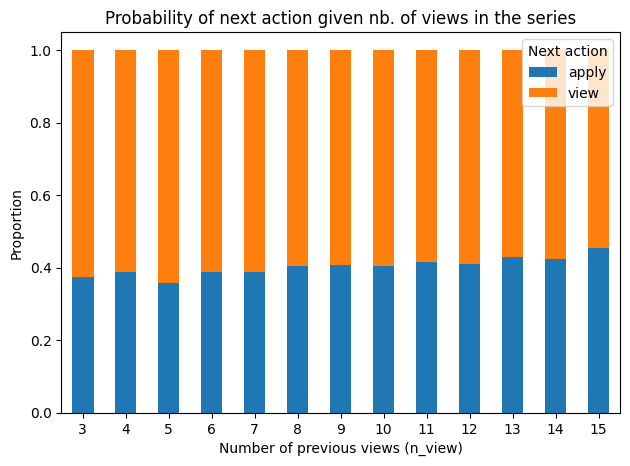

In [25]:
prop.plot(
    kind="bar",
    stacked=True
)

plt.xlabel("Number of previous views (n_view)")
plt.ylabel("Proportion")
plt.title("Probability of next action given nb. of views in the series")
plt.legend(title="Next action")
plt.tight_layout()
plt.xticks(rotation=0)
plt.show()


In [26]:
def trailing_views(actions):
    c = 0
    for a in reversed(actions):
        if a == "view":
            c += 1
        else:
            break
    return c

df["trail_view"] = df["actions"].apply(
    lambda x: trailing_views(ast.literal_eval(x)) if isinstance(x, str) else trailing_views(x)
)


prop2 = (
    df.groupby("trail_view")["action"]
      .value_counts(normalize=True)
      .unstack(fill_value=0)
)

prop2


action,apply,view
trail_view,,
0,0.805334,0.194666
1,0.330948,0.669052
2,0.280347,0.719653
3,0.131668,0.868332
4,0.113126,0.886874
5,0.095596,0.904404
6,0.082667,0.917333
7,0.071104,0.928896
8,0.046181,0.953819


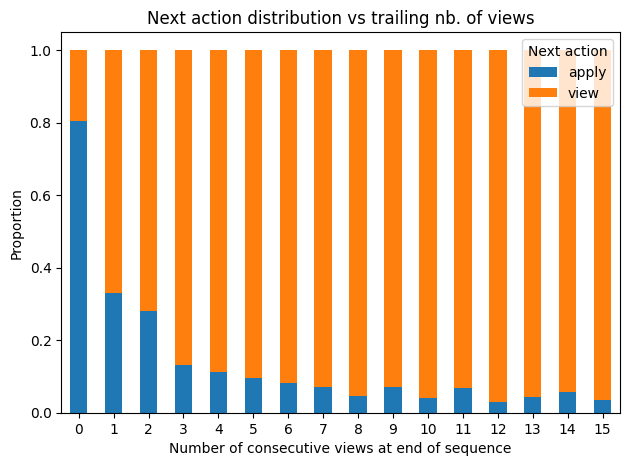

In [27]:
prop2.plot(kind="bar", stacked=True)

plt.xlabel("Number of consecutive views at end of sequence")
plt.ylabel("Proportion")
plt.title("Next action distribution vs trailing nb. of views")
plt.legend(title="Next action")
plt.tight_layout()
plt.xticks(rotation=0)
plt.show()

In [28]:
df

,session_id,job_ids,actions,actions_list,n_view,job_id,action,trail_view
0,0,"[305, 299, 300, 290, 282, 274, 264, 261]","['view', 'view', 'view', 'view', 'view', 'view...","[view, view, view, view, view, view, view, view]",8,84,view,8
1,1,"[84, 257, 252, 250]","['view', 'view', 'view', 'view']","[view, view, view, view]",4,241,view,4
2,2,"[241, 237, 221, 309, 310, 306, 301]","['view', 'view', 'apply', 'apply', 'apply', 'a...","[view, view, apply, apply, apply, apply, apply]",7,303,apply,0
3,3,"[303, 297, 296, 298, 294, 295, 292, 293]","['apply', 'apply', 'apply', 'apply', 'apply', ...","[apply, apply, apply, apply, apply, apply, app...",8,171,apply,0
4,4,"[171, 291, 289, 166, 288, 155]","['apply', 'apply', 'apply', 'apply', 'apply', ...","[apply, apply, apply, apply, apply, apply]",6,286,apply,0
...,...,...,...,...,...,...,...,...
15877,15877,"[26581, 27314, 27305, 27327, 27138, 27153]","['apply', 'apply', 'apply', 'apply', 'apply', ...","[apply, apply, apply, apply, apply, apply]",6,27055,apply,0
15878,15878,"[27220, 27219, 27194]","['view', 'view', 'view']","[view, view, view]",3,16013,view,3
15879,15879,"[27211, 27210, 27209]","['view', 'view', 'view']","[view, view, view]",3,27208,view,3
15880,15880,"[27233, 27220, 27219, 27232, 27231]","['apply', 'view', 'view', 'view', 'view']","[apply, view, view, view, view]",5,27230,view,4


### 3. Linear regression using one feature: the number of trailing 'view' actions before the next action

In [29]:
X = df[["trail_view"]]
y = df["action"]

In [30]:
X_train_ml, X_val_ml, y_train_ml, y_val_ml = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [31]:
clf = LogisticRegression()
clf.fit(X_train_ml, y_train_ml)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [32]:
y_pred = clf.predict(X_val_ml)

print(classification_report(y_val_ml, y_pred))

bal_acc = balanced_accuracy_score(y_val_ml, y_pred)
print(f"Balanced accuracy: {bal_acc:.3f}")


              precision    recall  f1-score   support

       apply       0.74      0.87      0.80      1255
        view       0.91      0.80      0.85      1922

    accuracy                           0.83      3177
   macro avg       0.82      0.84      0.83      3177
weighted avg       0.84      0.83      0.83      3177

Balanced accuracy: 0.838


- We train a simple logistic regression using one feature: the number of trailing 'view' actions.
- This feature is highly predictive of the next action.
- The model achieves 83% accuracy, far above the 60% baseline.
- It detects most 'apply' actions, with a recall of 87%.
- The more consecutive 'view' actions at the end of a session, the more likely the next action is to be 'apply'.


In [33]:
clf.coef_, clf.intercept_

(array([[0.59126335]]), array([-0.90507317]))